In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("..")  # Adds the parent directory to the Python path
import ST_calc as ST
from ST_calc import plot_calc

In [3]:
NIMH = 'https://s3.amazonaws.com/openneuro.org/ds004215/phenotype/demographics.tsv?versionId=ZrtBS977QEYq4f0_sP.3.gorcpzILsMC'
NIMH = pd.read_csv(NIMH, sep='\t')
NIMH.to_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',', index=False)


na_percentage = ((NIMH == -999) | (NIMH == -777)).mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

REFERRAL_TYPE_SECONDARY_5    100.000000
REFERRAL_TYPE_SECONDARY_4     99.946723
RACE_1_4                      99.893447
CURRENT_GENDER_2              99.840170
REFERRAL_TYPE_SECONDARY_3     99.840170
RACE_1_3                      99.733617
LGBT_IDENTITY_2               99.680341
RACE_1_2                      99.200852
PARTICIPATE_STUDY_4           98.987746
REFERRAL_TYPE_SECONDARY_2     98.188599
REFERRAL_TYPE_SECONDARY       75.013319
PARTICIPATE_STUDY_3           70.964305
PARTICIPATE_STUDY_2           39.904102
PARTICIPATE_NIH_STUDY         23.867874
WORK_NIH_CAMPUS               23.708045
dtype: float64

In [4]:
columns_to_drop = na_percentage[na_percentage > 75].index
NIMH = NIMH.drop(columns=columns_to_drop)
NIMH.to_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',', index=False)

In [5]:
suda = pd.read_csv('data_ds004215/suda_ds004215.csv', sep=',')
pif = pd.read_csv('data_ds004215/pif_ds004215.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004215/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004215/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004215/k-combined-3-13.csv', sep=',')


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.83
Kendall's Tau between suda & pif: 0.65, p-value: 0.0000


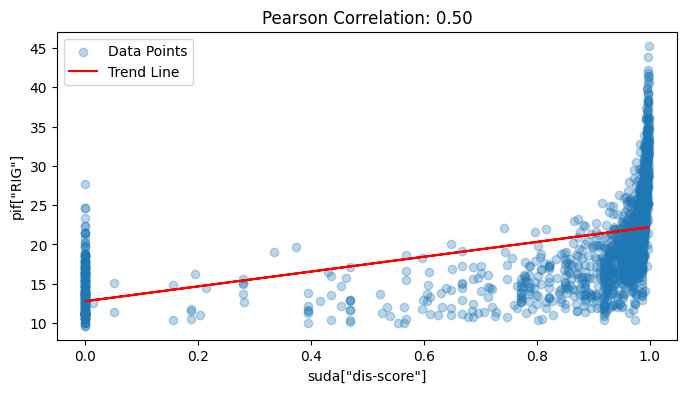

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.82
Pearson Correlation between K-combined & PIF field level: 0.39
Pearson Correlation between SUDA & K-combined field level: 0.09


Spearman Rank Correlation between PIF & SUDA: 0.84
Spearman Rank Correlation between PIF & K: 0.43
Spearman Rank Correlation between SUDA & K: 0.31


In [6]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

In [10]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, NIMH, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: -0.80
Pearson correlation to Suda sum & K-combined -0.41884436707438305
________________________________________________________________________
Pearson Correlation: -0.41884436707438305


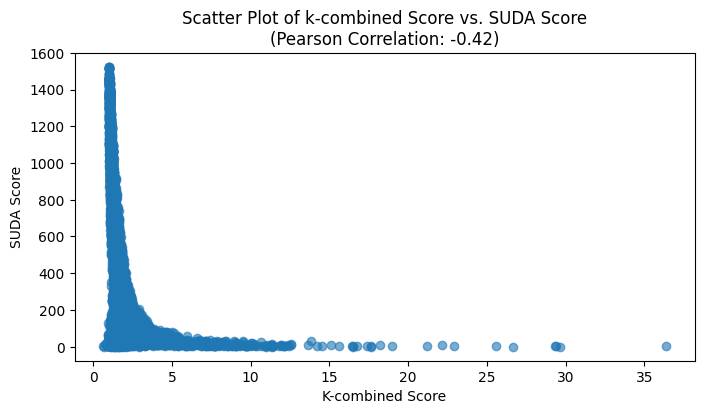

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: -0.67
Pearson correlation to PIF 95% & K-combined -0.3444304832161949


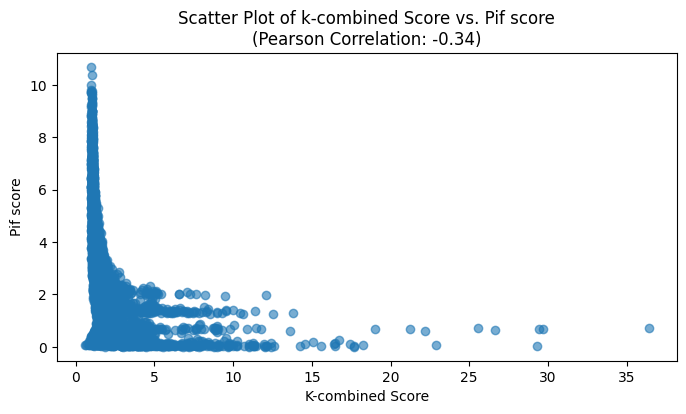

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.88
Pearson correlation to PIF 95% & SUDA 0.9245180177043344


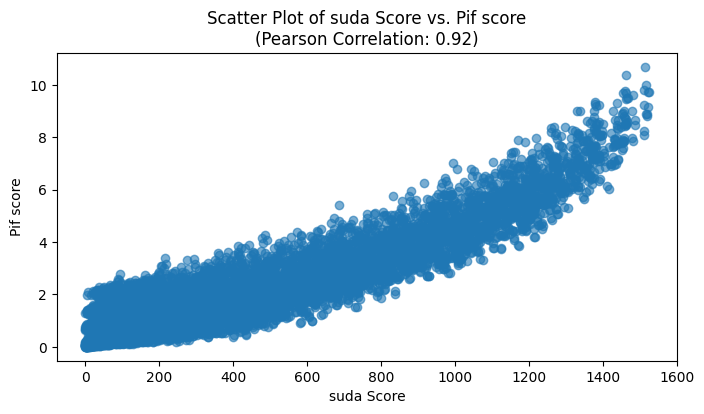

In [11]:
plot_calc(sum_score_df)

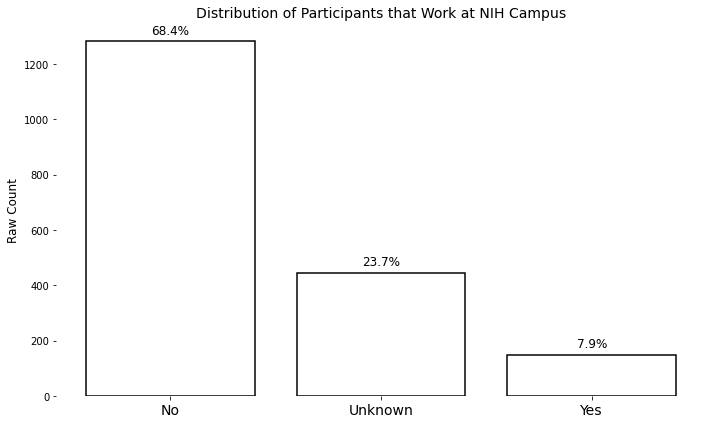

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Replace values and count occurrences
data = NIMH['WORK_NIH_CAMPUS'].replace({1: 'Yes', 0: 'No', -999: 'Unknown'}).value_counts()

# Calculate percentages
total = data.sum()
percentages = (data / total) * 100

# Plot the bar chart with reduced spacing between bars
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.8  # Set the bar width
x_positions = np.arange(len(data))  # Explicit x positions for reduced spacing

bars = ax.bar(
    x_positions, 
    data.values, 
    width=bar_width,  # Set the bar width
    color='white', 
    edgecolor='black',  # Black frame for the bars
    linewidth=1.5       # Thickness of the frame
)

# Add labels on top of each bar as percentages
for bar, percent in zip(bars, percentages):
    ax.annotate(
        f'{percent:.1f}%',  # The percentage with one decimal place
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 15),  # Add some space above the bar
        ha='center', va='bottom', fontsize=12  # Horizontal/Vertical alignment and font size
    )

# Customize x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(data.index, fontsize=14)

# Remove the plot frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add labels to the axes and title
ax.set_title('Distribution of Participants that Work at NIH Campus', fontsize=14)
ax.set_ylabel('Raw Count', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()


In [6]:
NIMH['age_at_visit'].max()

'90+'

In [20]:
# Define the list of columns to display
columns_to_show = [
    'WORK_NIH_CAMPUS',
    'GENDER',
    'ETHNICITY_1',
    'LGBT_IDENTITY',
    'EDUCATION',
    'EMPLOYMENT',
    'MARITAL_STATUS',
    'RACE_1',
    'INCOME',
    'LANGUAGE',
    'age_at_visit',
    'OTHER_LANGUAGE'
]

age_90_plus = NIMH[NIMH['age_at_visit'] == '90+']

age_90_plus_selected_columns = age_90_plus[columns_to_show]


age_90_plus_selected_columns


,WORK_NIH_CAMPUS,GENDER,ETHNICITY_1,LGBT_IDENTITY,EDUCATION,EMPLOYMENT,MARITAL_STATUS,RACE_1,INCOME,LANGUAGE,age_at_visit,OTHER_LANGUAGE
1158,0,2,0,0,3,3,5,5,7,English,90+,-999


In [43]:
unique_participants = NIMH['participant_id'].nunique()
unique_participants

1858